# Chapter 1 - Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import trim_mean

In [3]:
url = ('https://raw.githubusercontent.com/arvindbetrabet/Practical_Statistics_for_Data_Scientists/refs/heads/master/data/state.csv')

# Read the data from a .csv file
state = pd.read_csv(url)

state.head(9)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL


In [4]:
pd.options.display.float_format = '{:,.2f}'.format

# Get the summary of numerical data type columns in the data
state.describe()

,Population,Murder.Rate
count,50.00,50.00
mean,"6,162,876.30",4.07
std,"6,848,235.35",1.92
min,"563,626.00",0.90
25%,"1,833,004.25",2.42
50%,"4,436,369.50",4.00
75%,"6,680,312.25",5.55
max,"37,253,956.00",10.30


In [5]:
print(round(state['Population'].std(),2))

6848235.35


In [6]:
q75 = state['Population'].quantile(0.75)
q25 = state['Population'].quantile(0.25)

iqr  = q75 - q25

print(f'75th percentiles: {q75:.2f}')
print(f'25th percentiles: {q25:.2f}')
print(f'             IRQ: {iqr:.2f}')

75th percentiles: 6680312.25
25th percentiles: 1833004.25
             IRQ: 4847308.00


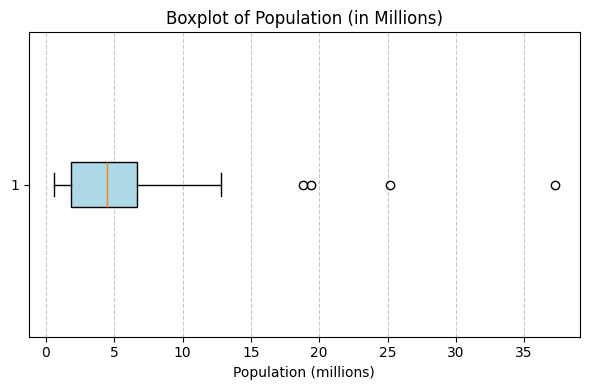

In [7]:
# Convert population values to millions
state['Population (millions)'] = state['Population'] / 1000000

# Create a boxplot for the Population in millions
plt.figure(figsize=(6, 4))
plt.boxplot(state['Population (millions)'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Population (millions)')
plt.title('Boxplot of Population (in Millions)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05   1.60
0.25   2.42
0.50   4.00
0.75   5.55
0.95   6.51
Name: Murder.Rate, dtype: float64


In [9]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]

df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))

df.index = [f'{p * 100}%' for p in percentages]

print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate  1.60   2.42   4.00   5.55   6.51


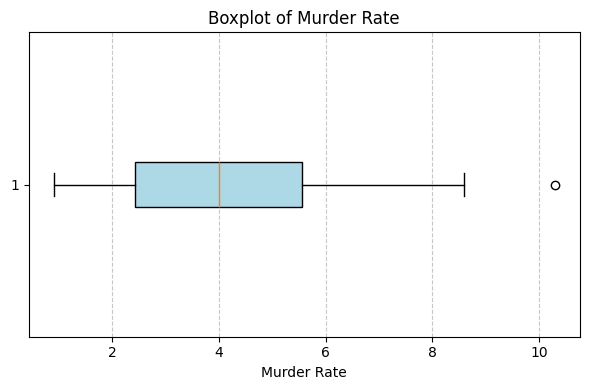

In [10]:
# Create a boxplot for the Population in millions
plt.figure(figsize=(6, 4))
plt.boxplot(state['Murder.Rate'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Murder Rate')
plt.title('Boxplot of Murder Rate')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Mean, Trimmed Mean, Weighted Mean, Median and Trimmed Median

In [12]:
state['Population'].mean()

6162876.3

In [13]:
state['Population'].median()

4436369.5

In [14]:
# Rename column heading
state.rename(columns={'Murder.Rate': 'MurderRate'}, inplace=True)

#### Why Weighted Mean?:

The **weighted mean** takes into account the population of each state to give a more accurate representation of the overall murder rate across the country.

Without weighting, each state's murder rate would contribute equally to the average, regardless of the state's population. For instance, a small state with a high murder rate would have the same impact as a large state with a low murder rate.

By using the population as a weight, larger states contribute proportionally to the average, which gives a more realistic measure of the overall murder rate for the entire population.

    State	  Population	Murder Rate (per 100,000)
    State A	    10,000	        5
    State B	    20,000	        2
    State C	    70,000	        3


             Arithmetic Mean (without weights): (5 + 2 + 3) / 3 = 3.33
    Weighted Mean (using population as weight): (5 * 10,000 + 2 * 20,000 + 3 * 70,000) / (10,000 + 20,000 + 70,000) = 3.0

In [17]:
murderRateWeightedMean = np.average(state.MurderRate, weights=state.Population)

print(murderRateWeightedMean)

4.445833981123393


#### Trimmed Median

In [19]:
# Mean after discarding top and bottom 10% of Population numbers, eliminating outliers
populationTrimmedMean = trim_mean(state.Population, 0.1)

print(populationTrimmedMean)

4783697.125


## Frequency Table and Histograms

The `cut` method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.

In [22]:
binnedPopulation = pd.cut(state['Population'], 10)

print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


In [23]:
binnedPopulation.name = 'binnedPopulation'         # Rename series
df = pd.concat([state, binnedPopulation], axis=1)  # Concatenate state and binnedPopulation
df = df.sort_values(by='Population')               # Sort by Population

groups = []  # Initialize groups list
for group, subset in df.groupby(by='binnedPopulation', observed=False):  # Group by binnedPopulation
    groups.append({
        'BinRange': group,                       # Bin range
        'Count': len(subset),                    # Count of states
        'States': ','.join(subset.Abbreviation)  # List of abbreviations
    })
pd.DataFrame(groups)                             # Create DataFrame from groups

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


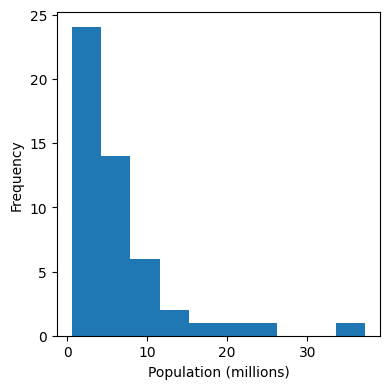

In [24]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))  # Plot histogram of Population in millions
ax.set_xlabel('Population (millions)')                            # Set x-axis label

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

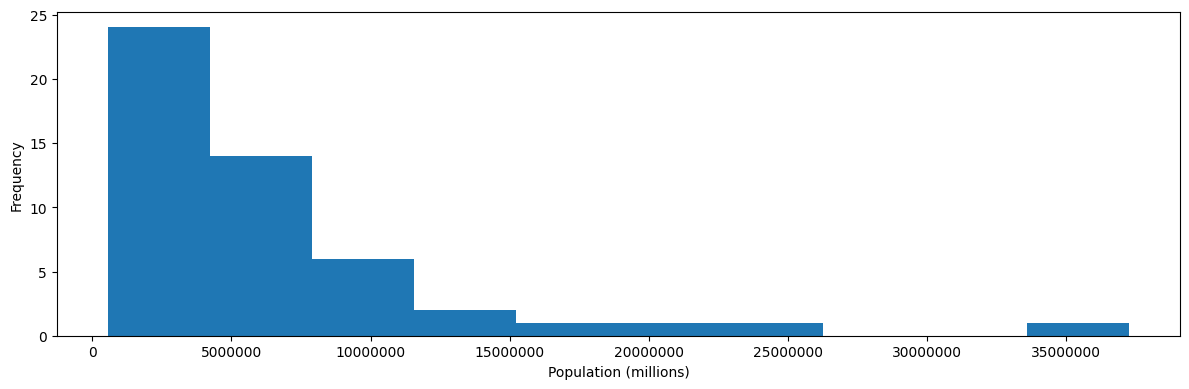

In [25]:
ax = (state['Population']).plot.hist(figsize=(12, 4))  # Plot histogram of Population
ax.set_xlabel('Population (millions)')                # Set x-axis label
ax.ticklabel_format(style='plain', axis='x')          # Disable scientific notation on x-axis

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

### Density Estimates
Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.

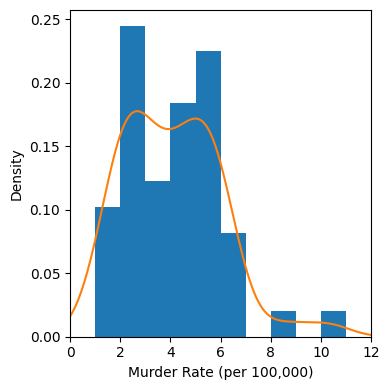

In [27]:
ax = state['MurderRate'].plot.hist(density=True,        # Plot histogram of MurderRate with density normalization
                                    xlim=[0, 12],       # Set x-axis limits from 0 to 12
                                    bins=range(1, 12),  # Set bin range from 1 to 11
                                    figsize=(4, 4))     # Set figure size

state['MurderRate'].plot.density(ax=ax)  # Plot density curve on the same axes

ax.set_xlabel('Murder Rate (per 100,000)')  # Set x-axis label

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

### Exploring Binary and Categorical Data

In [29]:
# Create the data as a dictionary
data = {
    "Carrier": [64263.16],
    "ATC": [84856.5],
    "Weather": [11235.42],
    "Security": [343.15],
    "Inbound": [118427.82]
}

# Create the DataFrame
dfw = pd.DataFrame(data)

# Display the DataFrame
dfw

,Carrier,ATC,Weather,Security,Inbound
0,"64,263.16","84,856.50","11,235.42",343.15,"118,427.82"


Pandas also supports bar charts for displaying a single categorical variable.

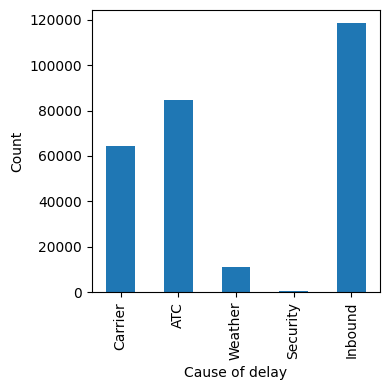

In [31]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)  # Transpose the DataFrame and plot a bar chart
ax.set_xlabel('Cause of delay')                              # Set x-axis label
ax.set_ylabel('Count')                                       # Set y-axis label

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

### Correlation

In [33]:
url2 = ('https://raw.githubusercontent.com/arvindbetrabet/Practical_Statistics_for_Data_Scientists/refs/heads/master/data/sp500_sym.csv')

# Read the data from a .csv file
sp500_sym = pd.read_csv(url2)

# Read the CSV file from the .gz compressed file, specifying 'Unnamed: 0' as the index column
sp500_px = pd.read_csv('sp500_data.csv.gz', compression='gzip', index_col='Unnamed: 0')

# Display the first few rows of the DataFrame
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.00,0.06,-0.02,0.00,0.00,0.02,0.01,0.09,0.26,-0.01,...,0.00,0.00,0.35,0.00,0.04,0.00,0.02,1.75,0.12,0.00
1993-02-01,0.00,-0.18,0.03,0.00,0.00,0.02,0.02,0.12,-0.10,0.06,...,0.00,0.00,-0.23,0.00,0.00,-0.01,0.01,1.25,0.12,0.00
1993-02-02,0.00,-0.12,0.04,0.00,0.00,-0.08,0.03,-0.02,0.03,-0.01,...,0.00,0.00,-0.12,0.00,0.00,0.00,-0.01,-0.25,0.00,0.00
1993-02-03,0.00,0.06,-0.02,0.00,0.00,-0.15,0.00,-0.25,-0.04,-0.01,...,0.00,0.00,-0.09,0.00,0.04,-0.04,-0.04,-0.50,0.06,0.00
1993-02-04,0.00,-0.36,-0.06,0.00,0.00,0.11,-0.02,0.07,0.00,-0.01,...,0.00,0.00,0.14,0.00,-0.04,-0.03,-0.05,0.00,0.06,0.00


In [34]:
# Convert the index to datetime format
sp500_px.index = pd.to_datetime(sp500_px.index)

# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates from July 1, 2012, onwards
telecom = sp500_px.loc['2012-07-01':, telecomSymbols]

telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.42,0.14,0.07,0.55,-0.52
2012-07-03,-0.18,0.07,0.07,-0.03,-0.05
2012-07-05,-0.16,-0.13,0.06,-0.05,-0.18
2012-07-06,0.34,0.13,0.01,0.14,-0.36
2012-07-09,0.14,0.12,-0.02,0.25,0.18
...,...,...,...,...,...
2015-06-25,0.05,-1.60,-0.04,-0.19,-0.33
2015-06-26,-0.26,0.04,-0.07,0.03,-0.74
2015-06-29,-0.10,-0.56,-0.06,-0.50,-1.36
2015-06-30,-0.50,-0.42,-0.07,-0.52,0.20


In [35]:
# Calculate and print the correlation
telecom_corr = telecom.corr()
telecom_corr

,T,CTL,FTR,VZ,LVLT
T,1.00,0.47,0.33,0.68,0.28
CTL,0.47,1.00,0.42,0.42,0.29
FTR,0.33,0.42,1.00,0.29,0.26
VZ,0.68,0.42,0.29,1.00,0.24
LVLT,0.28,0.29,0.26,0.24,1.00


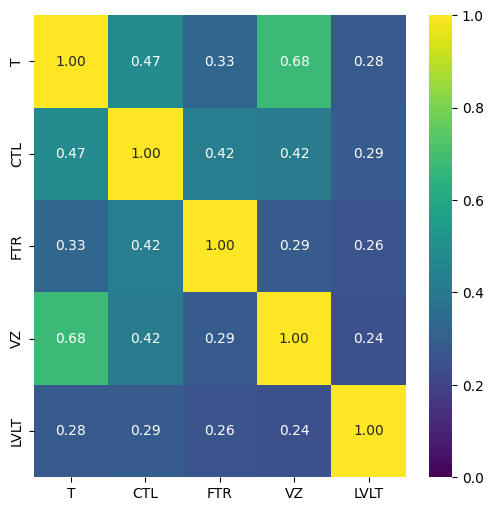

In [36]:
from seaborn import heatmap  # Import the heatmap function from Seaborn for correlation matrix visualization

fig, ax = plt.subplots(figsize=(6, 6))  # Create a figure and axis with dimensions 6x6 inches
ax = heatmap(                           # Generate a heatmap to display the correlation matrix of features in X
    telecom.corr(),                     # Compute the correlation matrix for the DataFrame X
    fmt=".2f",                          # Format the annotation text to 2 decimal places
    annot=True,                         # Annotate each cell in the heatmap with its correlation value
    ax=ax,                              # Use the specified axis for the plot
    cmap="viridis",                     # Set the color palette to 'RdBu_r' (red to blue, reversed)
    vmin=0,                             # Set the minimum value of the color scale to 0 (strong negative correlation)
    vmax=1,                             # Set the maximum value of the color scale to 1 (strong positive correlation)
)

In [37]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

             XLI   QQQ   SPY   DIA   GLD    VXX   USO   IWM   XLE   XLY   XLU  \
2012-07-02 -0.38  0.10  0.03 -0.24  0.42 -10.40  0.00  0.53  0.03  0.10  0.10   
2012-07-03  0.38  0.48  0.87  0.73  0.49  -3.52  0.25  0.93  1.00  0.00 -0.04   
2012-07-05  0.15  0.10 -0.10  0.15  0.24   6.56 -0.07 -0.17 -0.46  0.31 -0.15   
2012-07-06 -0.14 -0.49  0.02 -0.21 -0.52  -8.80 -0.18 -0.23  0.21  0.15  0.08   
2012-07-09  0.24 -0.05 -0.06 -0.17  0.43  -0.48  0.46 -0.19 -0.23 -0.20 -0.04   

             XLB   XTL   XLV   XLP   XLF   XLK  
2012-07-02 -0.09  0.02 -0.01  0.31  0.02  0.08  
2012-07-03  0.34  0.00  0.00  0.13  0.10  0.24  
2012-07-05  0.10  0.02 -0.14 -0.07 -0.14  0.07  
2012-07-06  0.02 -0.43 -0.10  0.12  0.07 -0.23  
2012-07-09 -0.17  0.00  0.35 -0.06  0.02  0.01  


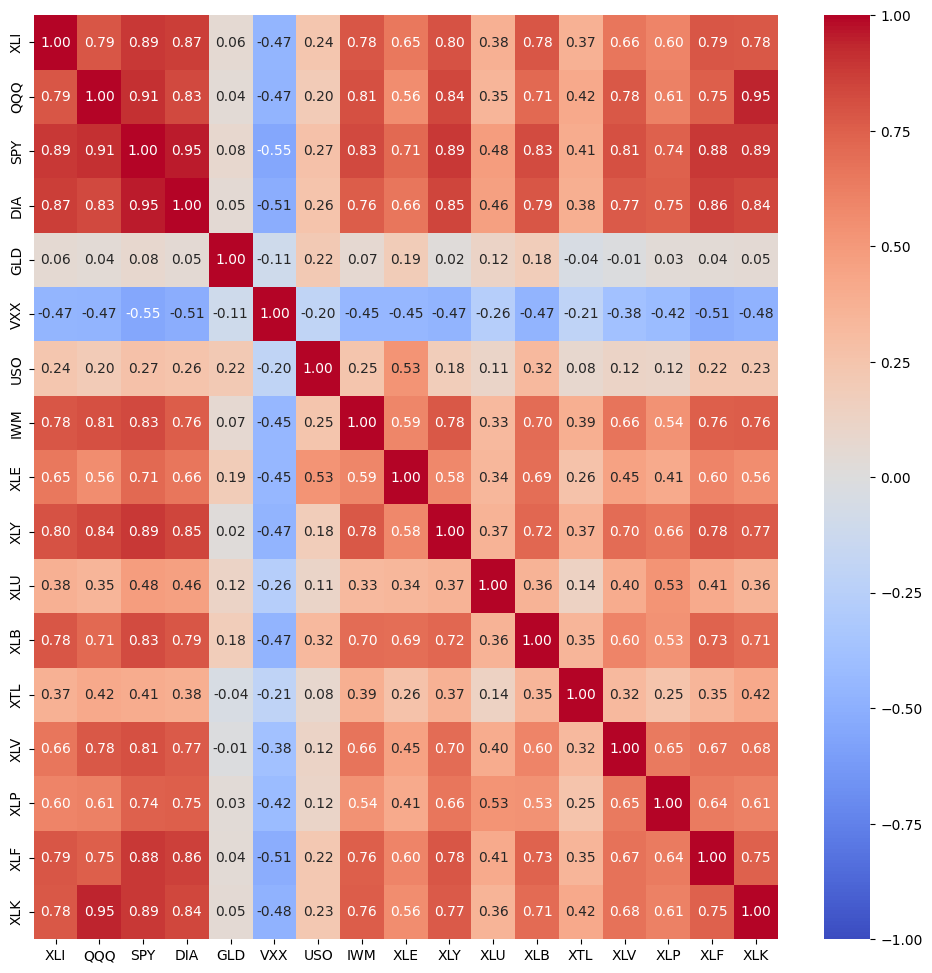

In [38]:
fig, ax = plt.subplots(figsize=(12, 12)) # Create a figure and axis with dimensions 6x6 inches
ax = heatmap(                            # Generate a heatmap to display the correlation matrix of features in X
    etfs.corr(),                         # Compute the correlation matrix for the DataFrame X
    fmt=".2f",                           # Format the annotation text to 2 decimal places
    annot=True,                          # Annotate each cell in the heatmap with its correlation value
    ax=ax,                               # Use the specified axis for the plot
    cmap="coolwarm",                     # Set the color palette to 'RdBu_r' (red to blue, reversed)
    vmin=-1,                             # Set the minimum value of the color scale to 0 (strong negative correlation)
    vmax=1,                              # Set the maximum value of the color scale to 1 (strong positive correlation)
)

### Scatterplots

In [40]:
telecom_corr

,T,CTL,FTR,VZ,LVLT
T,1.00,0.47,0.33,0.68,0.28
CTL,0.47,1.00,0.42,0.42,0.29
FTR,0.33,0.42,1.00,0.29,0.26
VZ,0.68,0.42,0.29,1.00,0.24
LVLT,0.28,0.29,0.26,0.24,1.00


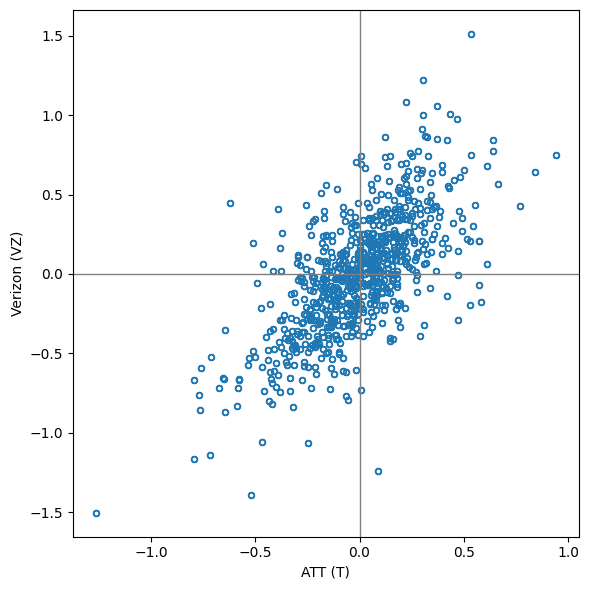

In [41]:
ax = telecom.plot.scatter(x='T',              # Plot a scatter plot with 'T' on the x-axis
                          y='VZ',             # Plot 'VZ' on the y-axis
                          figsize=(6, 6),     # Set the figure size to 6x6 inches
                          marker='$\u25EF$')  # Use a circle marker ('\u25EF' is a white circle character)
ax.set_xlabel('ATT (T)')                      # Set the x-axis label to 'ATT (T)'
ax.set_ylabel('Verizon (VZ)')                 # Set the y-axis label to 'Verizon (VZ)'
ax.axhline(0, color='grey', lw=1)             # Add a horizontal line at y=0 with a grey color and line width of 1
ax.axvline(0, color='grey', lw=1)             # Add a vertical line at x=0 with a grey color and line width of 1

plt.tight_layout()                            # Adjust the layout to fit all elements
plt.show()                                    # Display the plot

## Exploring Two or More Variables

In [43]:
url3 = ('https://raw.githubusercontent.com/arvindbetrabet/Practical_Statistics_for_Data_Scientists/refs/heads/master/data/kc_tax.csv')

# Read the data from a .csv file
kc_tax = pd.read_csv(url3)

kc_tax.head(9)

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,"98,117.00"
1,"206,000.00",1870,"98,002.00"
2,"303,000.00",1530,"98,166.00"
3,"361,000.00",2000,"98,108.00"
4,"459,000.00",3150,"98,108.00"
5,"223,000.00",1570,"98,032.00"
6,"259,000.00",1770,"98,168.00"
7,"175,000.00",1150,"98,168.00"
8,"178,000.00",1980,"98,168.00"


In [44]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

print(kc_tax0.shape)

(432693, 3)


#### Hexagonal binning and Contours

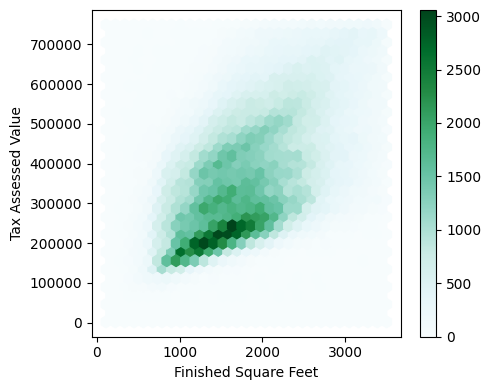

In [46]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving',      # Create a hexbin plot with 'SqFtTotLiving' on the x-axis
                         y='TaxAssessedValue',   # Use 'TaxAssessedValue' on the y-axis
                         gridsize=30,            # Set the number of hexagons to 30 across each axis
                         sharex=False,           # Allow the x-axis range to differ from other plots
                         figsize=(5, 4))         # Set figure size to 5x4 inches

ax.set_xlabel('Finished Square Feet')            # Set the x-axis label
ax.set_ylabel('Tax Assessed Value')              # Set the y-axis label

plt.tight_layout()                               # Adjust the layout to fit all elements
plt.show()                                       # Display the plot

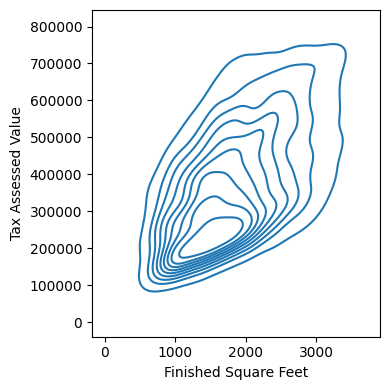

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))  # Create a figure and axis with a size of 4x4 inches

sns.kdeplot(data=kc_tax0.sample(10000), # Plot a kernel density estimate (KDE) with a sample of 10,000 points from kc_tax0
            x='SqFtTotLiving',          # Use 'SqFtTotLiving' on the x-axis
            y='TaxAssessedValue',       # Use 'TaxAssessedValue' on the y-axis
            ax=ax)                      # Plot on the previously created axis

ax.set_xlabel('Finished Square Feet')   # Set the x-axis label
ax.set_ylabel('Tax Assessed Value')     # Set the y-axis label

plt.tight_layout()                      # Adjust layout to fit all elements
plt.show()                              # Display the plot

#### Two Categorical Variables

In [49]:
url4 = ('https://raw.githubusercontent.com/arvindbetrabet/Practical_Statistics_for_Data_Scientists/refs/heads/master/data/lc_loans.csv')

# Read the data from a .csv file
lc_loans = pd.read_csv(url4)

lc_loans.head()

,status,grade
0,Fully Paid,5.40
1,Charged Off,4.80
2,Fully Paid,5.00
3,Fully Paid,4.20
4,Current,6.00


In [50]:
crosstab = lc_loans.pivot_table(index='grade',             # Group data by 'grade' as row index
                                columns='status',          # Set 'status' as column labels
                                aggfunc=lambda x: len(x),  # Count the number of occurrences for each combination
                                margins=True)              # Add totals for rows and columns (with label 'All')

crosstab      # Display the pivot table

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
0.20,146,661,216,63,1086
0.40,96,524,138,42,800
0.60,63,360,101,45,569
0.80,51,228,100,32,411
1.00,53,217,88,17,375
1.20,400,2598,686,161,3845
1.40,333,1875,576,140,2924
1.60,302,1748,448,134,2632
1.80,267,1309,347,91,2014


In [51]:
# Define the grade boundaries
grade_bins = [0, 1, 2, 3, 4, 5, 6, 7]
grade_labels = ['G', 'F', 'E', 'D', 'C', 'B', 'A']

# Create a new column for categorized grades
lc_loans['grade_category'] = pd.cut(lc_loans['grade'], bins=grade_bins, labels=grade_labels)

# Re-create the crosstab with the new aggregated grade categories
crosstab_aggregated = lc_loans.pivot_table(index='grade_category', 
                                           columns='status', 
                                           aggfunc=lambda x: len(x), 
                                           margins=True,
                                           observed=False)  # Explicitly set observed=False to retain current behavior

# Reorder the index to display A at the top, G at the bottom, followed by All
desired_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'All']
crosstab_aggregated = crosstab_aggregated.reindex(desired_order)

# Display the new aggregated crosstab
crosstab_aggregated

grade                                 
status         Charged Off Current Fully Paid  Late     All
grade_category                                             
A                     1562   50051      20408   469   72490
B                     5302   93852      31160  2056  132370
C                     6023   88928      23147  2777  120875
D                     5007   53281      13681  2308   74277
E                     2842   24639       5949  1374   34804
F                     1526    8444       2328   606   12904
G                      409    1990        643   199    3241
All                  22671  321185      97316  9789  450961

### Categorical and Numeric Data

In [53]:
url5 = ('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/airline_stats.csv')

# Read the data from a .csv file
airline_stats = pd.read_csv(url5)

airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.15,1.97,0.76,American
1,5.96,3.71,1.59,American
2,7.16,2.71,2.03,American
3,12.10,11.03,0.00,American
4,7.33,3.37,1.77,American


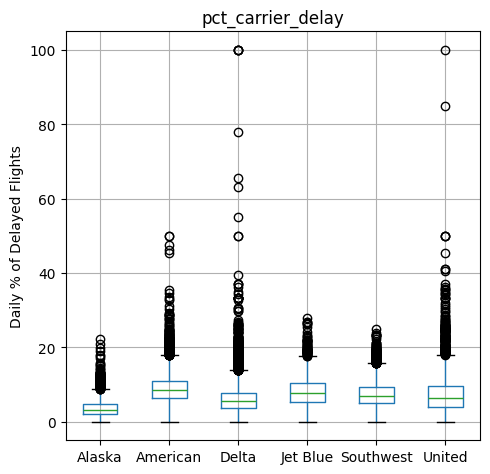

In [54]:
# Create a boxplot for 'pct_carrier_delay' by 'airline', with a figure size of 5x5 inches
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(5, 5))

ax.set_xlabel('')                            # Remove x-axis label to avoid clutter
ax.set_ylabel('Daily % of Delayed Flights')  # Set label for y-axis indicating what is being measured

plt.suptitle('')    # Remove the default 'boxplot grouped by' title for cleaner output
plt.tight_layout()  # Adjust the layout to avoid overlapping elements
plt.show()          # Display the plot

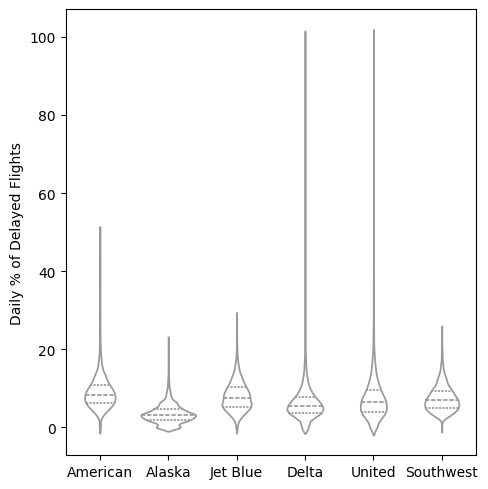

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))  # Create a figure and axis with a size of 5x5 inches

# Plot a violin plot of 'pct_carrier_delay' by 'airline' using Seaborn
sns.violinplot(data=airline_stats,        # Use the airline_stats DataFrame for the data
               x='airline',               # Set 'airline' as the x-axis variable
               y='pct_carrier_delay',     # Set 'pct_carrier_delay' as the y-axis variable
               ax=ax,                     # Use the pre-created axis for plotting
               inner='quartile',          # Show inner quartiles within the violin plot
               color='white')             # Set the violin plot color to white for a cleaner appearance

ax.set_xlabel('')                         # Remove the x-axis label to declutter the plot
ax.set_ylabel('Daily % of Delayed Flights')  # Set the y-axis label

plt.tight_layout()                        # Adjust the layout to ensure everything fits nicely
plt.show()                                # Display the plot

### Visualizing Multiple Variables

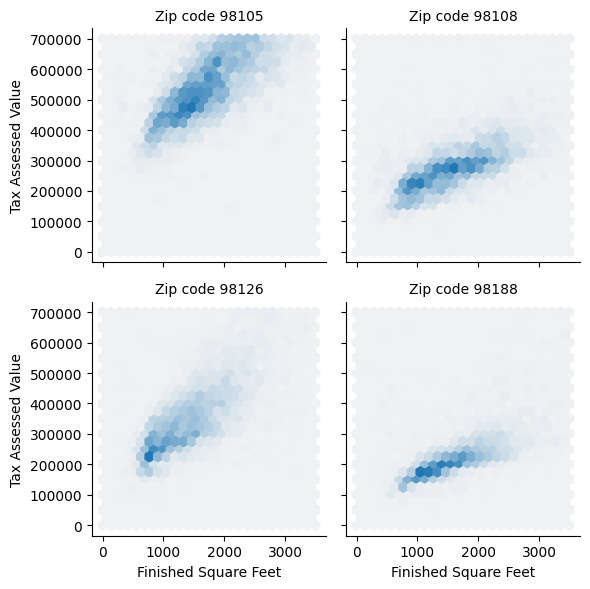

In [57]:
zip_codes = [98188, 98105, 98108, 98126]                      # Define a list of target zip codes
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]  # Filter kc_tax0 DataFrame for rows where ZipCode is in the list of target zip codes
kc_tax_zip                                                    # Display the filtered DataFrame

# Define a custom function to create a hexbin plot
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)       # Create a color map based on the provided color
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)  # Plot hexbin with specified gridsize and color map

# Create a FacetGrid to visualize hexbin plots for different zip codes
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)  # Create facets for each ZipCode, wrapping after 2 columns
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',        # Apply the hexbin plot to each facet
      extent=[0, 3500, 0, 700000])                        # Set limits for x (SqFtTotLiving) and y (TaxAssessedValue)

g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')  # Set labels for x and y axes
g.set_titles('Zip code {col_name:.0f}')                          # Set titles for each facet showing the zip code

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()          # Display the plots